### <center>Decision Trees</center>

This is supervised learning, but overfitting can be a huge problem
1. **Clssification trees**: split data on a feature value and each split minimizes the netropy
2. **regression trees**: group data into target variable ranges, and minizies cost in each split
  - Random forest
  - bootstrapping

In [16]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [1]:
# import packages
  # !pip install pydotplus --upgrade
import pandas as pd
import numpy as np
from pandas import DataFrame

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve,auc
import pylab as pl
from IPython.display import Image
import pydotplus

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
w_df = pd.read_csv(url,header=0,sep=';')

#### <center>regression trees</center>

In [2]:
#fit the model
train, test = train_test_split(w_df, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['quality']]
x_test = test.iloc[0:,0:11]
y_test = test[['quality']]

model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)

print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.3356418192211731
Testing R-Square 0.289645103493692


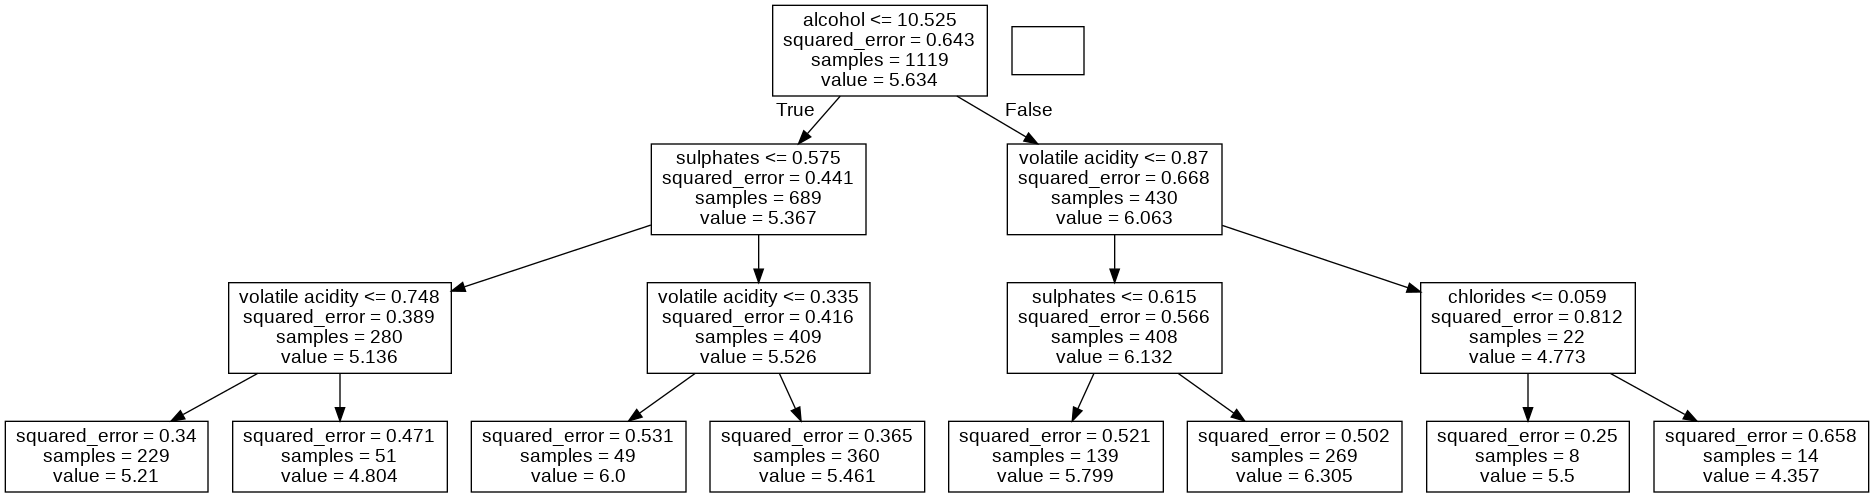

In [4]:
# view the tree
feature_names = [key for key in w_df if not key=='quality']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### <center>classification trees</center>

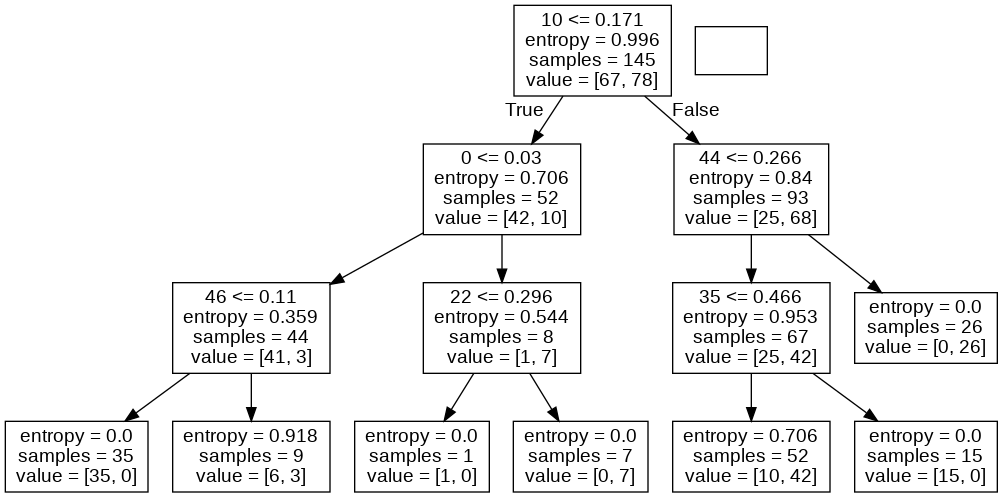

In [8]:
# fit the model
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
train, test = train_test_split(df, test_size = 0.3)

x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

#visualize
feature_names = [key for key in df if not key == 60]
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

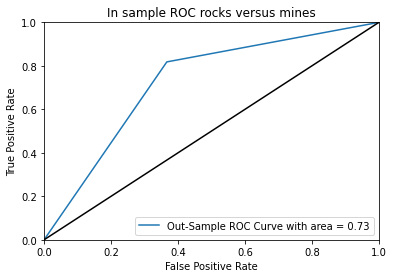

In [14]:
#ROC curve
p_train=model.predict(x_train)
p_test = model.predict(x_test)
confusion_matrix(np.array(y_test),p_test)

%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

**random forest**

[[20 10]
 [ 4 29]]
[0.06242854 0.01348714 0.02051542 0.02885178 0.01940466 0.00989187
 0.01015024 0.00894612 0.01467325 0.03959318 0.0595661  0.07032788
 0.00545188 0.01505444 0.02522327 0.00230422 0.00569973 0.00269347
 0.00635908 0.0170914  0.00874326 0.00439056 0.00910252 0.01252961
 0.         0.01366605 0.01587946 0.01478114 0.00837864 0.02294623
 0.01994569 0.00861547 0.0253207  0.01807235 0.         0.01958998
 0.02289859 0.01566453 0.01040857 0.00968098 0.00978265 0.01250544
 0.01749842 0.01518316 0.03859151 0.0169137  0.04376703 0.00854611
 0.0473985  0.02301901 0.00408685 0.01463495 0.00250108 0.
 0.01322828 0.01484722 0.00714082 0.00917411 0.         0.00285318]


Text(0.5, 0, 'Relative Importance')

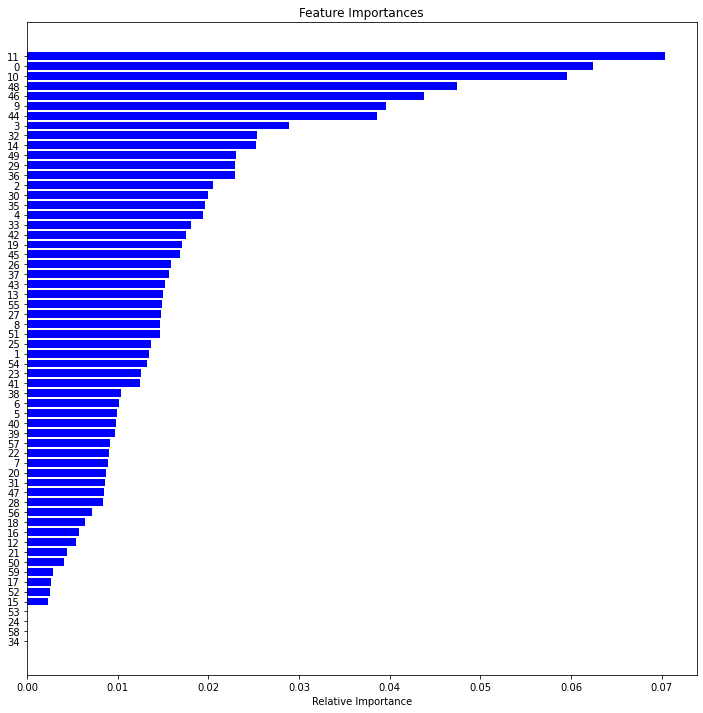

In [17]:
# fitting the model
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,np.ravel(y_train))

# evaluating
model.score(x_test,y_test) # percentage correctly classified
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
print(cfm)
importances = model.feature_importances_
print(importances)

#visualize
%matplotlib inline
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

**bootstrapping**

In [19]:
# import packages
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

#fit the model1
model=BaggingClassifier()
model.fit(x_train,np.ravel(y_train))

model=BaggingClassifier(max_features=5,max_samples=10,n_estimators=30)
model.fit(x_train,np.ravel(y_train))
model.score(x_test,y_test)

#fit the model2
parameters = {
     'n_estimators':(30, 50), #the number of trees
     'max_samples':(30,40,50),
     'max_features':(5,10,20),
     #'oob_score':np.ravel(y_test)
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_



(0.7718253968253967,
 {'max_features': 10, 'max_samples': 40, 'n_estimators': 30})